# GRADTDA5622 - Big Data Computing Foundations 2
## CRISP_DM EXAMPLE - USING ENHANCED IRIS DATASET
- 1 BUSINESS UNDERSTANDING Step - **Partially** Filled In
- 2 DATA UNDERSTANDING Step / Exploratory Data Analysis (EDA) - Filled In
- 3 DATA PREPARATION Step - Filled In
- 4 MODELING Step - Filled In
- 5 EVALUATION Step - Filled In
- 6 DEPLOYMENT Step - Not filled In

These examples are drawn from a number of sources.  See citations.

Based on CRISP-DM Template Version V12.
***

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
- **(I will fill this in for each assignment - Tom Bihari)**
***

**The Objectives of This Assignment are:**
1. ...

**Instructions:**
- ...

**Business Problem:**
- ...

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [1]:
import numpy as np
import pandas as pd

#!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.use('Qt5Agg')

import seaborn as sns

pd.set_option('display.max_columns', 50) #include to avoid ... in middle of display

***
# Section: 1 - Business Understanding
- This step is essential (and occasionally ignored…).  It focuses on understanding the business needs and objectives, and defining a data analysis problem that is relevant and useful to the business, so the right solution is built.

- Consider the following questions and discuss the possible answers to them in the spaces below.
  - It is OK to say that you do not know.  How might you get answers to the questions?
  - You may consider some of the questions to be "not applicable".  If so, why?
  - You may choose to use markdown instead of raw text in the answer cells, to make them "pretty" and easy to read.
***

**Context**
- What is the overview, history, big picture?

**We would like to develop a Classification algorithm that can take an image of an Iris flower, plus information about where the image was taken, and ***classify*** the flower as one of three Iris ***species***.  We already have the technology to process the image and measure certain characteristics of the flower.**  Much more to be said here...

**Business Objectives**
- What is the problem or opportunity to be addressed / solved?
- What is its business value?

**Stakeholders**
- Who are they?
- What are their needs?

**General Goals**
- Understand the past/current state (descriptive)?
- Predict the future (predictive)?
- Mine for unknown patterns / insights?
- Answer questions?  What are they?
- Support decisions?  What are they?

**Scope**
- What is the specific scope of the project?
- What, specifically, is NOT in scope?  (What are you not doing that someone might think you are doing?)
Is the scope flexible?  In what way?

**Deliverables**
- Report?
- Reusable code?
- Presentation?

**Success Criteria**
- What, specifically, must be accomplished for this project to be a success?

**Solution Approach**
- Is this a “one time” (throw away) solution?
- Or will the solution become part of repeated process that is used and enhanced over time?

**Quality**
- What level of Correctness or Confidence is needed?
- Is this life-critical or are we looking for ‘directionally correct’ results?

**Constraints**
- Are there legal / regulatory implications (privacy, security, liability, HIPAA, FERPA)?
- Are there architectural constraints?

**Time / Cost**
- What is the deadline or budget?

**Dependencies**
- Is this project dependent on any other project or activity?
- Is any other project or activity dependent on this project?

**Resources Needed**
- Do you potentially need access to specific people, data, etc?

**Other Considerations**
- What other considerations, not covered above, might be relevant?

***
# Section: 2 - Data Understanding
- Perform exploratory data analysis of the dataset by looking at individual attributes and/or combinations of attributes. You should focus on identifying and describing interesting observations and insights that you might uncover from the data.
- You should not simply provide the basic EDA information for all attributes in the data. Instead, you should focus on those that are more interesting or important, and provide some discussion of what you observe. Pay particular attention to potentially interesting bivariate (two-variable) relationships, as well as the relationship between each attribute and the class attribute (if this is a classification problem).
- This step includes:
  - Understanding what data might be available and relevant.
  - Acquiring the data.
  - Understanding the characteristics of the data (e.g., quality, completeness, currency, consistency,…).
  - Understanding how other datasets might enhance or supplement the data (and acquiring that data as well).
  - Possibly performing some initial analysis to build confidence that the overall direction is likely to be helpful to the business problem to be solved.

**NOTE:** Frequently, a first pass is made through the data to fix or remove "obvious" data quality issues (missing values, duplicate records, outliers (some), etc.).  The deeper Data Understanding analysis then is done on the "cleaned" data.  This mitigates the issue of bad data skewing the data analysis results.  **For this example, we will not do this separate first pass.**
***

***
## Section: 2.1 - Describe the meaning and type of data for each attribute.

Identify the type of data for each attribute.
  - Categorical: Nominal, Ordinal
  - Numerical: Interval, Ratio
  - Other: Complex or unstructured data (e.g., text strings, images,...)
  
NOTES:
  - This determines what operations are "meaningful" for each attribute.  For example, you can't add two Ordinal attributes.
  - You can't always tell the attribute types from the data itself.  For example, an Integer attribute could be Ordinal or Interval.

Identify interesting characteristics of the data (e.g., quality, completeness, currency, consistency,…).
  - Is this dataset relevant and appropriate for the goals of this project?
    - If not, what could you do? (find other data to replace or supplement this dataset, etc.)
***

### **Examine the meta-data (e.g., from data dictionary) available for the dataset.**

This is a copy of the traditional Iris dataset, with additional attributes added to provide more opportunities for analyzing the data.  The original Iris attributes are italicized below.  Some of the variations of this dataset (see the Excel file referenced below) have been modified to add errors.  In particular, the **enhanced1_copy_with_errors** version of the data has intentional errors (missing values, duplicate records, outliers, etc.).  The **enhanced1_copy_clean** version of the data does not include these errors.  The attributes are as follows:
- **Attribute,  Type,  DataType,  Meaning**
- row_id,  ordinal,  integer,  Record number 0,1,2,3,…
- *sepal_length*,  ratio,  float,  Length in CM
- *sepal_width*,  ratio,  float,  Width in CM
- *petal_length*,  ratio,  float,  Length in CM
- *petal_width*,  ratio,  float,  Width in CM
- *species*,  nominal,  string,  (setosa, versicolor, virginica)
- sepal_area,  ratio,  float,  Area in CM^2
- sepal_shape_val,  ratio,  float,  sepal_length / sepal_width
- sepal_shape,  nominal,  string,  If (sepal_shape_val<2) "square"; else "oblong"
- petal_area,  ratio,  float,  Area in CM^2
- petal_shape_val,  ratio,  float,  petal_length / petal_width
- petal_shape,  nominal,  string,  If (petal_shape_val<3) "square"; else if(petal_shape_val<6),"oblong"; else "very_long"
- color,  nominal,  string,  Flower color: (white, purple, pink, violet, lavender, blue)
- zone,  ordinal,  integer,  USDA Plant Hardiness Zone (number only).  See: https://planthardiness.ars.usda.gov/

**Discussion:**

Fill in...

### **Load the Dataset.**

In [2]:
# NOTES:
# Depending on your setup, you may need to change the path to the data file.
# Some environments may support .XLS Excel files, but not .XLSX files, in which case, you may need to use Excel to convert the data file to the supported format.
# You may play with this example using the "with_errors" version of the data, and/or the "clean" version of the data, by commenting in/out the appropriate line below.
#  The "data quality" discussions in this notebook are based on the "with_errors" version.

data_df = pd.read_excel("teb_enhanced_iris_dataset_v2.xlsx", sheet_name="enhanced1_copy_with_errors")
#data_df = pd.read_excel("teb_enhanced_iris_dataset_v2.xlsx", sheet_name="enhanced1_copy_clean")

# Print the schema, based on the data in the file.
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   row_id           152 non-null    int64  
 1   sepal_length     152 non-null    float64
 2   sepal_width      152 non-null    float64
 3   petal_length     152 non-null    float64
 4   petal_width      152 non-null    float64
 5   species          151 non-null    object 
 6   sepal_area       151 non-null    float64
 7   sepal_shape_val  152 non-null    float64
 8   sepal_shape      151 non-null    object 
 9   petal_area       152 non-null    float64
 10  petal_shape_val  152 non-null    float64
 11  petal_shape      152 non-null    object 
 12  color            152 non-null    object 
 13  zone             152 non-null    int64  
dtypes: float64(8), int64(2), object(4)
memory usage: 16.8+ KB


**Discussion:**

Fill in...

In [3]:
# Create some simple lists for future use
all_attribute_names = list(data_df)
print(all_attribute_names)
class_attribute_name = 'species'
nominal_attribute_names = ['species', 'sepal_shape', 'petal_shape', 'color']
ordinal_attribute_names = ['zone'] #['row_id', 'zone']  # row_id may not be needed
categorical_attribute_names = nominal_attribute_names + ordinal_attribute_names
interval_attribute_names = []
ratio_attribute_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_area', 'sepal_shape_val', 'petal_area', 'petal_shape_val']
numerical_attribute_names = interval_attribute_names + ratio_attribute_names

['row_id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species', 'sepal_area', 'sepal_shape_val', 'sepal_shape', 'petal_area', 'petal_shape_val', 'petal_shape', 'color', 'zone']


**Discussion:**

Fill in...

***
## Section: 2.2 - Provide basic statistics for the attributes.
- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.
***

In [4]:
# # This is an optional step.  Pandas Profiling is a library that provides a sophisticated profiling report
# #  that can be saved in the form of an interactive HTML file.  See: https://pypi.org/project/pandas-profiling/
# #  It may run very slowly on large datasets.  It is best to limit the number of records to profile, based on
# #  experimentation with your computer.  You can do so by profiling small samples from large datasets.
# #  You also can specify the "minimal=True" argument in newer versions of the library.
# # To install, uncomment and run the following line (one time).
# #!pip install pandas_profiling

# import pandas_profiling
# if data_df.shape[0] > 500:
#     profile = pandas_profiling.ProfileReport(data_df.sample(n=500))  # Limit to a small set of records.
#     #profile = pandas_profiling.ProfileReport(data_df, minimal=True)  # Limit to the simpler profiling.
# else:
#     profile = pandas_profiling.ProfileReport(data_df)       
# profile.to_file("./profilereport.html")

# # Set plotting back to interactive mode (pandas_profiling sets it to non-interactive)
# %matplotlib inline

**Discussion:**

Fill in...

In [5]:
data_df.describe() #calculates statistics for all numerical columns

,row_id,sepal_length,sepal_width,petal_length,petal_width,sepal_area,sepal_shape_val,petal_area,petal_shape_val,zone
count,152.000000,152.000000,152.000000,152.000000,152.000000,151.000000,152.000000,152.000000,152.000000,152.000000
mean,75.230263,5.840789,3.051316,3.777632,1.207237,18.439735,1.939376,5.843553,4.346696,6.526316
std,43.675424,0.827376,0.431690,1.760463,0.761760,8.880396,0.480484,4.702909,2.639890,7.745922
min,0.000000,4.300000,2.000000,1.000000,0.100000,10.000000,-1.411765,0.110000,2.125000,3.000000
25%,37.750000,5.100000,2.800000,1.600000,0.300000,15.650000,1.558972,0.420000,2.797368,5.000000
50%,75.500000,5.800000,3.000000,4.400000,1.300000,17.640000,2.032292,5.680000,3.292857,6.000000
75%,112.250000,6.400000,3.300000,5.100000,1.800000,20.250000,2.225806,9.717500,4.666667,7.000000
max,149.000000,7.900000,4.400000,6.900000,2.500000,118.870000,2.961538,15.870000,15.000000,99.000000


**Discussion:**
Note that there are some suspicious values above.  These may be data quality issues.  Suggestions:
- The extremely large **sepal_area** is clearly wrong and can be filled in by the formula in the metadata.
- The negative **sepal_shape_val** is clearly wrong and can be filled in by the formula in the metadata.
- The **sepal_area** count is different from the other counts. It will be handled below.
- The **zone** of "99" will be handled below.

***
## Section: 2.3 - Visualize / analyze the most important or interesting attributes using appropriate techniques.
- For each visualization, provide an interpretation explaining why it is appropriate or interesting. What does each visualization tell us?
***

In [6]:
# Count the unique values for the categorical attributes.
print("Total Records:", data_df.shape[0], "- Value Counts per Categorical Attribute:\n")
for att in categorical_attribute_names:
    print(data_df[att].value_counts(normalize = False, sort = True, ascending = False, bins = None, dropna = False))
    print("\n")

Total Records: 152 - Value Counts per Categorical Attribute:

virginica     51
versicolor    50
setosa        49
setos          1
NaN            1
Name: species, dtype: int64


oblong    84
square    67
NaN        1
Name: sepal_shape, dtype: int64


oblong       73
square       45
very_long    33
olong         1
Name: petal_shape, dtype: int64


violet       43
white        33
pink         27
purple       21
blue         17
lavender     11
Name: color, dtype: int64


6     31
5     29
4     26
8     21
7     20
9     13
3     11
99     1
Name: zone, dtype: int64




**Discussion:**
Note that there are some suspicious values above.  These may be data quality issues.  Suggestions:
- The NaN values are discussed in the sections below.
- For the **species** attribute, the "setos" value is clearly a typo and could be corrected to "setosa".
- For the **petal_shape** attribute, the "olong" value is clearly a typo and could be corrected to "oblong".
- For the **zone** attribute, there is no such "99" zone.  Most likely, this is a typo, and should be "9".  But it might also be a special "flag" value entered by the creator of the dataset.  Further research is needed, but for now, let's assume we should change "99" to "9".

***
## Section: 2.4 - Verify data quality: explain any missing values, duplicate data, or outliers.
- What, if anything, do you need to do about these? Be specific.
***

### **Missing Attribute Values**

In [7]:
# Count the missing values for the entire dataframe.
na_df = data_df[data_df.isna().any(axis=1)]
num_records_with_na = na_df.shape[0]
num_na_values = na_df.isna().sum().sum()

print("Total Records:", data_df.shape[0], "- Number of Records with NA:", num_records_with_na, "- Number of NA Values:", num_na_values)
na_df.head(10)

# Show the missing values for each attribute.
print("NA Values per Attribute:")
for att in all_attribute_names:
    num_na = na_df[att].isna().sum()
    if num_na > 0:
        print(att,na_df[att].isna().sum())

Total Records: 152 - Number of Records with NA: 3 - Number of NA Values: 3
NA Values per Attribute:
species 1
sepal_area 1
sepal_shape 1


**Discussion:**
Suggested actions:
- The missing **sepal_area** can be filled in by **sepal_width * sepal_length** (see metadata).
- The missing **sepal_shape** can be filled in by the formula in the metadata.
- The missing **species** is problematic.  The resolution depends on the expected use of this data.  If the species is the "class" attribute and we want to use this dataset for training a classifier model, then we could / should remove this record.

### **Duplicate Records**

In [8]:
# Find duplicate records across all attributes.
dup_df = data_df[data_df.duplicated()]
num_dup_records = dup_df.shape[0]

print("Number of duplicate records across all attributes:", num_dup_records)
dup_df.head(10)

Number of duplicate records across all attributes: 1


,row_id,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,sepal_shape_val,sepal_shape,petal_area,petal_shape_val,petal_shape,color,zone
112,111,6.4,2.7,5.3,1.9,virginica,17.28,2.37037,oblong,10.07,2.789474,square,violet,5


**Discussion:**
The **row_id** "111" records are completely identical.  Suggested action:
- Remove all but one of the "111" duplicate rows.

In [9]:
# Find duplicate records across one or more specific attributes.
# This is useful for finding duplicate records that have the same "unique identifier", which should never happen.
dup_df = data_df[data_df.duplicated(['row_id',])]
num_dup_records = dup_df.shape[0]

list_of_duplicates = dup_df['row_id'].unique()
list_of_duplicates.sort()
#print(list_of_duplicates)
complete_dup_df = data_df.loc[data_df['row_id'].isin(list_of_duplicates)]

print("Number of duplicate record (multiples) for the *row_id* attribute:", num_dup_records)
complete_dup_df.head(10)

Number of duplicate record (multiples) for the *row_id* attribute: 2


,row_id,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,sepal_shape_val,sepal_shape,petal_area,petal_shape_val,petal_shape,color,zone
111,111,6.4,2.7,5.3,1.9,virginica,17.28,2.370370,oblong,10.07,2.789474,square,violet,5
112,111,6.4,2.7,5.3,1.9,virginica,17.28,2.370370,oblong,10.07,2.789474,square,violet,5
150,149,4.9,3.0,5.1,1.8,virginica,17.70,1.966667,square,9.18,2.833333,square,pink,9
151,149,5.9,3.0,5.1,1.8,virginica,17.70,1.966667,square,9.18,2.833333,square,pink,9


**Discussion:**
The **row_id** "149" records have the same row_id, but differ in the **sepal_length** field.  Suggested actions:
- Remove one of the duplicate rows, OR set the row_id of one of them to a new, unused number.

### **Outliers**
- There are many ways to discover and handle outliers, and many resources online.  Here is a nice discussion:
- https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe

In [16]:
# This is a simple filter that uses 1.5 x the Inter-Quantile Range.
# See: https://stackoverflow.com/questions/69248118/detect-outliers-across-all-columns-of-pandas-dataframe
def find_outliers(df_in, att_name):
    quantile_low  = 0.25  # These are typical values, but you can set them as apropriate - see literature
    quantile_high = 0.75
    multiplier = 1.5
    
    Q1 = df_in[att_name].quantile(quantile_low)
    Q3 = df_in[att_name].quantile(quantile_high)
    IQR = Q3-Q1
    good_range_low  = Q1 - multiplier * IQR
    good_range_high = Q3 + multiplier * IQR
    
    outlier_list=((df_in[att_name] <= good_range_low) | (df_in[att_name] >= good_range_high)).tolist()
    outlier_indices=[i for i, x in enumerate(outlier_list) if x]

    print("\nAttribute: [", att_name, "]   Good Range: [",good_range_low, ",", good_range_high, "]   Number of Outliers: [", len(outlier_indices),"]")

    plt.figure(figsize=(10,1))
    sns.boxplot(x=att_name, data=df_in)
    plt.show()

    if len(outlier_indices) > 0:
        outlier_value_list = []
        for i in outlier_indices:
            outlier_value_list.append( [i, df_in.iloc[i][att_name]] )
            
        from operator import itemgetter
        outlier_value_list = sorted(outlier_value_list, key=itemgetter(1), reverse=True)
        
        print("Index           Value")
        for i in outlier_value_list:
            print("%5d      %10.3f" % (i[0], i[1]))
    
    return outlier_indices


Attribute: [ sepal_length ]   Good Range: [ 3.1499999999999986 , 8.350000000000001 ]   Number of Outliers: [ 0 ]


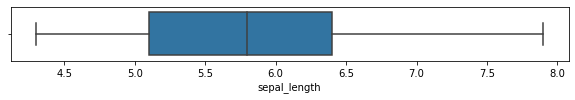


Attribute: [ sepal_width ]   Good Range: [ 2.05 , 4.05 ]   Number of Outliers: [ 4 ]


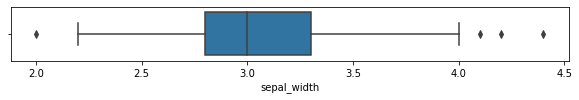

Index           Value
   15           4.400
   33           4.200
   32           4.100
   60           2.000

Attribute: [ petal_length ]   Good Range: [ -3.649999999999999 , 10.349999999999998 ]   Number of Outliers: [ 0 ]


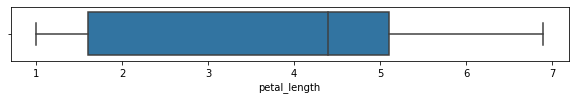


Attribute: [ petal_width ]   Good Range: [ -1.95 , 4.05 ]   Number of Outliers: [ 0 ]


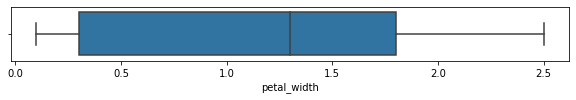


Attribute: [ sepal_area ]   Good Range: [ 8.749999999999996 , 27.150000000000002 ]   Number of Outliers: [ 3 ]


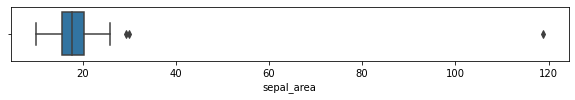

Index           Value
   21         118.870
  132          30.020
  118          29.260

Attribute: [ sepal_shape_val ]   Good Range: [ 0.558719758064516 , 3.226058467741936 ]   Number of Outliers: [ 1 ]


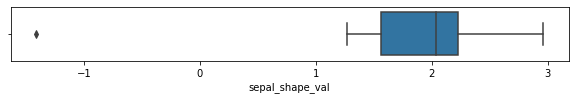

Index           Value
   24          -1.412

Attribute: [ petal_area ]   Good Range: [ -13.52625 , 23.66375 ]   Number of Outliers: [ 0 ]


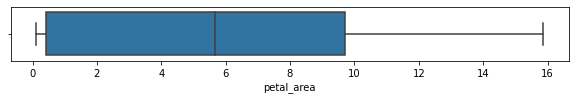


Attribute: [ petal_shape_val ]   Good Range: [ -0.0065789473684207955 , 7.47061403508772 ]   Number of Outliers: [ 19 ]


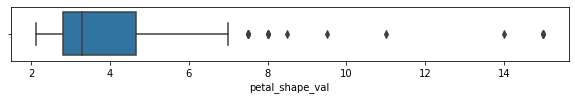

Index           Value
    9          15.000
   32          15.000
   34          15.000
   37          15.000
   12          14.000
   13          11.000
   24           9.500
   20           8.500
   11           8.000
   25           8.000
   29           8.000
   30           8.000
   46           8.000
    3           7.500
    7           7.500
   10           7.500
   27           7.500
   39           7.500
   48           7.500


In [17]:
outlier_indices = []
for att in numerical_attribute_names:
    outlier_indices = find_outliers(data_df, att)
    outlier_indices.extend(outlier_indices)
#print(f"All Outlier Indices: {outlier_indices}")

**Discussion:**
Suggested actions:
- The **sepal_width** looks OK.  The outliers are not much out of the normal range.
- The **sepal_area** has one clearly wrong value.  The other outliers are not much out of the normal range.  The clearly wrong value can be filled in by **sepal_width * sepal_length** (see metadata).
- The negative **sepal_shape_val** is clearly wrong and can be filled in by the formula in the metadata.
- The **petal_shape_val** looks OK.  The outliers are not much out of the normal range.

***
## Section: 2.5 - Explore the relationships among the attributes.
- You may include or exclude the class attribute as appropriate.
- Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques. Explain and interpret any interesting relationships.
- There are three general cases for 2-attribute relationships:
  - Categorical vs Categorical
  - Categorical vs Numerical
  - Numerical vs Numerical
***

### **Categorical Attribute vs Categorical Attribute**

In [ ]:
# EXAMPLE: Visualize the relationship between two specific categorical variables.
from statsmodels.graphics.mosaicplot import mosaic

plt.rcParams['font.size'] = 10.0
plt.rcParams["figure.figsize"]=(9,9)
mosaic(data_df.sort_values(by='zone', ascending=True), ['color', 'zone'], title='')
plt.show()

In [ ]:
def chi2_test(data_frame, categorical_variable1, categorical_variable2, alpha):
    import pandas as pd
    from scipy import stats
    
    if categorical_variable1==categorical_variable2:
        return 0.00, False    # Comparing variable with self.  p_value = 0, reject_h0 = False
    
    # Convert to crosstab contigency table
    mycrosstab=pd.crosstab(data_frame[categorical_variable1],data_frame[categorical_variable2])
    #print(mycrosstab)
    # Get p_value and other information
    stat,p_value,dof,expected = stats.chi2_contingency(mycrosstab)
    #print("Details:",categorical_variable1,categorical_variable2,stat,p_value,dof)
    # Round very small p_value to zero
    p_value = round(p_value,10)
    # Expected frequencies should be at least 5 for the majority (80%) of the cells.
    # Check expected frequency of each group
    cntexpected = expected[expected<5].size
    # Get percentage 
    perexpected = ((expected.size-cntexpected)/expected.size)*100
    if perexpected<20:
        p_value = 2.00        # Assign 2 as a flag that result is inconclusive
    # Reject H0?
    reject_h0 = (p_value < alpha)
    return p_value, reject_h0

In [ ]:
# Use Chi-Squared test to check for a relationship between all pairs of categorical variables.
# See, for example: https://medium.com/analytics-vidhya/constructing-heat-map-for-chi-square-test-of-independence-6d78aa2b140f
def create_chi2_matrix(df):
    column_names = df.columns # Assign column names to row indexs 
    chisqmatrix = pd.DataFrame(df,columns=column_names,index=column_names)

    outercnt = 0
    innercnt = 0
    for icol in column_names: # outer loop
        for jcol in column_names: # inner loop
            p_value, reject_h0 = chi2_test(df, icol, jcol, 0.05)
            chisqmatrix.iloc[outercnt,innercnt] = p_value
            innercnt = innercnt+1
        outercnt = outercnt+1
        innercnt = 0
    return chisqmatrix

In [ ]:
# Use Chi-Squared test to check for relationships between all pairs of categorical variables.
# If a p-value in the table below is less than a chosen alpha (say 0.05), then the H0 hypothesis that
#   there is NO relationship between the two variables is REJECTED.
chi2matrix = create_chi2_matrix(data_df[categorical_attribute_names])
display(chi2matrix)

**Discussion:**
- Based on the ChiSquared test, with Alpha chosen to be 0.05, there is a relationship between all pairs of variables, EXCEPT **color** and **zone**.
- So if we were given the task of predicting the species based on the other attributes, we would not want to remove any of the categorical attributes (at this point at least).

### **Categorical Attribute vs Numerical Attribute**

In [ ]:
# # EXAMPLE: Visualize the relationship between a specific categorical variable and a specific numerical variable.
# #   (Violin plots work nicely too.)
# plt.rcParams["figure.figsize"]=(5,5)
# ax = data_df.boxplot('petal_length', by='species')
# ax.get_figure().suptitle(t="")
# plt.title("Box Plot petal_length by species")
# plt.show()

In [ ]:
# Visualize the relationship between a specific categorical variable (the class variable in this case)
#   and all numerical variables.  (Violin plots work nicely too.)
for f in numerical_attribute_names:
    plt.figure(figsize=(5,5))
    sns.boxplot(x="species", y=f, data=data_df)

In [ ]:
# Compute ANOVA for a specific categorical and numerical variable pair.
# Note: You also can use the t-test if there are only two values for the categorical variable.
def anova_test(data_frame, categorical_variable, numerical_variable, alpha):
    # See: https://towardsdatascience.com/statistics-in-python-using-anova-for-feature-selection-b4dc876ef4f0
    # Calculate the f-value using the statsmodel module. 
    # You first build the model using the ols() function, and then call the fit() function on the instance of the model.
    # Finally, you call the anova_lm() function on the fitted model and specify the type of ANOVA test to perform on it:
    #   There are 3 types of ANOVA tests to perform, but their discussion is beyond the scope of this discussion.
    # Note: Hypothesis H0 = There is NO significant influence of the categorical variable on the numerical variable.
    import statsmodels.api as sm
    from statsmodels.formula.api import ols

    param_string = numerical_variable + " ~ " + categorical_variable
    model = ols(param_string, data=data_frame).fit()
    result = sm.stats.anova_lm(model, typ=2)
    #print(result)

    p_value = result.iat[0, 3]
    reject_h0 = (p_value < alpha)
    return p_value, reject_h0

In [ ]:
# Compute ANOVA for the categorical attribute "species" and each numerical attribute.
# Note: Hypothesis H0 = There is NO significant influence of the categorical attribute on the numerical attribute.
alpha = 0.05  # Chosen by the data analyst, based on the business problem.
cat_att = "species"

print("   P_Value             Reject_H0        Cat_Attribute        Num_Attribute")
for num_att in numerical_attribute_names:
    p_value, reject_h0 = anova_test(data_df, cat_att, num_att, alpha)
    print("%10.6f  %20s %20s %20s" % (p_value, reject_h0, cat_att, num_att))

**Discussion:**
- Based on the Anova test, with Alpha chosen to be 0.05, there is a relationship between **species** and each of the numerical attributes.
- So if we were given the task of predicting the species based on the other attributes, we would not want to remove any of the numerical attributes (at this point at least).

### **Numerical Attribute vs Numerical Attribute**

In [ ]:
# # EXAMPLE: Visualize the relationship between one specific pair of numerical variables, to look for potential relationship.
# groups = data_df.groupby('species')
# for name, group in groups:
#     plt.plot(group.sepal_length, group.petal_length, marker='o', linestyle='', markersize=5, label=name)

# plt.legend()

In [ ]:
# Visualize the relationship between all pairs of numerical variables, to look for potential relationships.
sns.pairplot(data = data_df[numerical_attribute_names+[class_attribute_name]], hue=class_attribute_name, height=3)
plt.show()

In [ ]:
# Compute all of the (Pearson) *linear* correlations between pairs of numerical variables and display a heatmap.
# Note: You also could compute Spearman's Rank correlation (which can capture non-linear relationships).
#   See: https://www.statology.org/spearman-correlation-python/

cor = data_df[numerical_attribute_names].corr(method='pearson').round(2)
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True, center=0.0, cmap='coolwarm')

In [ ]:
# # Note that for our purposes, a strong *negative* relationship may be as valuable as a strong *positive* relationship,
# #   so we could do the following to look at absolute values.
# cor = abs(data_df[numerical_attribute_names].corr(method='pearson').round(2))
# plt.figure(figsize=(10,10))
# sns.heatmap(cor,annot=True, center=0.5, cmap='coolwarm')

**Discussion:**
- Based on the Pearson correlations, there is a (linear) relationship between many pairs of numerical attributes.
  - (Note that for our purposes, a strong *negative* relationship may be as valuable as a strong *positive* relationship.)
  - This may allow us to trim down the "redundant" attributes for use in the classification algorithm. 

***
## Section: 2.6 - Identify and explain any interesting relationships between the class attribute and the other attributes.
- You may refer to earlier analyses / visualizations (if you included the class attribute above) or create new ones.
***

**Discussion:**
- The **species** attribute is the Class attribute for this exercise.
- As shown in the previous sections, each of the categorical and numerical attributes has a significant relationship with the **species** attribute.
  - Therefore, each of these **X** attributes might have value as input to a classification algorithm to predict the **y** class attribute (**species**).

***
# Section: 3 - Data Preparation
In this step, the “final” target dataset is constructed (although nothing is ever final…), based on the insights gleaned in the Data Understanding step.
This may include:
- Normalizing / standardizing the data.
- Handling missing and erroneous data.
- Transforming or eliminating attributes.
- “Blending” data from multiple sources (with attention to consistency of the various sources).
- Deploying the data to storage in suitable formats, data models / structures.
***

***
## Section: 3.1 - Clean the Data
- Implement any data cleaning steps previously identified.  Please justify.
- Show the effects of that cleaning through the use of appropriate statistics and/or visualizations.
***

In [ ]:
# Create a copy of the dataset for cleaning
clean_data_df = data_df.copy()

**Revise the Data**

species:
- For the **species** attribute, the "setos" value is clearly a typo and could be corrected to "setosa".
- The missing **species** is problematic.  The resolution depends on the expected use of this data.  If the species is the "class" attribute and we want to use this dataset for training a classifier model, then we could / should remove this record.

In [ ]:
clean_data_df['species'] = clean_data_df['species'].replace(to_replace='setos', value='setosa')

In [ ]:
clean_data_df = clean_data_df.dropna(subset=['species'])
clean_data_df = clean_data_df.reset_index(drop=True)

zone:
- For the **zone** attribute, there is no such "99" zone.  Most likely, this is a typo, and should be "9".  But it might also be a special "flag" value entered by the creator of the dataset.  Further research is needed, but for now, let's assume we should change "99" to "9".

In [ ]:
clean_data_df['zone'] = clean_data_df['zone'].replace(to_replace=99, value=9)

row_id:
- The **row_id** "111" records are completely identical.  Suggested action:
    - Remove all but one of the "111" duplicate rows.
- The **row_id** "149" records have the same row_id, but differ in the **sepal_length** field.  Suggested actions:
    - Remove all but one of the duplicate rows, OR set the row_id of one of them to a new, unused number. (I chose the former.)

In [ ]:
clean_data_df.drop_duplicates(keep='first', inplace=True)  # This removes all but one copy of the records that are completely identical.
clean_data_df = clean_data_df.reset_index(drop=True)

In [ ]:
clean_data_df.drop_duplicates(subset=['row_id'], keep='first', inplace=True)  # This removes all but one copy of the records that have identical row_ids.
clean_data_df = clean_data_df.reset_index(drop=True)

sepal_area:
- The **sepal_area** has one clearly wrong value (118.87).  The other outliers are not much out of the normal range.  The clearly wrong value can be filled in by **sepal_width * sepal_length** (see metadata).
- The **sepal_area** has one NaN value.  The NaN value can be filled in by **sepal_width * sepal_length** (see metadata).

In [ ]:
clean_data_df.loc[(clean_data_df.sepal_area >= 118.0) & (clean_data_df.sepal_area <= 119.0),'sepal_area'] = \
    clean_data_df.sepal_length * clean_data_df.sepal_width

In [ ]:
clean_data_df['sepal_area'].fillna(clean_data_df['sepal_width'] * clean_data_df['sepal_length'], inplace=True)

sepal_shape_val:
- The negative **sepal_shape_val** (-1.412) is clearly wrong and can be filled in by the formula in the metadata.

In [ ]:
clean_data_df.loc[(clean_data_df.sepal_shape_val >= -1.42) & (clean_data_df.sepal_shape_val <= -1.41),'sepal_shape_val'] = \
    clean_data_df.sepal_length / clean_data_df.sepal_width

sepal_shape:
- The NaN **sepal_shape** value can be filled in by the formula in the metadata:
  - If (sepal_shape_val<2) "square"; else "oblong"

In [ ]:
clean_data_df['sepal_shape'] = np.where((clean_data_df.sepal_shape_val < 2), "square", clean_data_df.sepal_shape)
clean_data_df['sepal_shape'] = np.where((clean_data_df.sepal_shape_val >= 2), "oblong", clean_data_df.sepal_shape)

petal_shape:
- For the **petal_shape** attribute, the "olong" value is clearly a typo and could be corrected to "oblong".

In [ ]:
clean_data_df['petal_shape'] = clean_data_df['petal_shape'].replace(to_replace='olong', value='oblong')

**Check the Results**

In [ ]:
# Data before cleaning
data_df.describe()

In [ ]:
# Data after cleaning
clean_data_df.describe()

In [ ]:
clean_data_df.head(999)

In [ ]:
# Get the duplicate records across all attributes.
dup_df = clean_data_df[clean_data_df.duplicated()]
num_dup_records = dup_df.shape[0]
print("Number of duplicate records across all attributes:", num_dup_records)
dup_df.head(10)

In [ ]:
# Get the missing values for the entire dataframe.
na_df = clean_data_df[clean_data_df.isna().any(axis=1)]
num_records_with_na = na_df.shape[0]
num_na_values = na_df.isna().sum().sum()
print("Total Records:", clean_data_df.shape[0], "- Number of Records with NA:", num_records_with_na, "- Number of NA Values:", num_na_values)
na_df.head(10)

In [ ]:
# Get the unique values for the categorical attributes.
print("Total Records:", clean_data_df.shape[0], "- Value Counts per Categorical Attribute:\n")
for att in categorical_attribute_names:
    print(clean_data_df[att].value_counts(normalize = False, sort = True, ascending = False, bins = None, dropna = False))
    print("\n")

In [ ]:
# Get the outliers for the numerical attributes.
outlier_indices = []
for att in numerical_attribute_names:
    outlier_indices = find_outliers(clean_data_df, att)
    outlier_indices.extend(outlier_indices)

***
## Section: 3.2 - Select Attributes
- Optionally, remove attributes that are unneeded, redundant, etc., for the expected uses.
- Which attributes did you decide to remove, if any? Please justify.
***

**Discussion:**
- Based on the ChiSquared test, with Alpha chosen to be 0.05, there is a relationship between all pairs of variables, EXCEPT **color** and **zone**.
  - So if we were given the task of predicting the species based on the other attributes, we would not want to remove any of the categorical attributes (at this point at least).
  - However, this may allow us to trim down the "redundant" attributes for use in the classification algorithm.
- Based on the Anova test, with Alpha chosen to be 0.05, there is a relationship between **species** and each of the numerical attributes.
  - So if we were given the task of predicting the species based on the other attributes, we would not want to remove any of the numerical attributes (at this point at least).
- Based on the Pearson correlations, there is a (linear) relationship between many pairs of numerical attributes.
  - This may allow us to trim down the "redundant" attributes for use in the classification algorithm.
- The **species** attribute is the Class attribute for this exercise.
  - As shown in the previous sections, each of the categorical and numerical attributes has a significant relationship with the **species** attribute.
    - Therefore, each of these **X** attributes might have value as input to a classification algorithm to predict the **y** class attribute (**species**).
    
If we look at the **sepal area and shape**, vs the **petal area and shape**, it appears that the **petal** attributes are more predictive of the **species**.  So let's remove the sepal shape and area attributes.

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(x="species", y="petal_area", data=clean_data_df)

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(x="species", y="sepal_area", data=clean_data_df)

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(x="species", y="sepal_shape_val", data=clean_data_df)

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(x="species", y="petal_shape_val", data=clean_data_df)

In [ ]:
# Remove the attributes
clean_data_df.drop('sepal_area', axis=1, inplace=True)
clean_data_df.drop('sepal_shape_val', axis=1, inplace=True)
clean_data_df.drop('sepal_shape', axis=1, inplace=True)

In [ ]:
clean_data_df.describe()

***
## Section: 3.3 - Create Attributes
- Optionally, create new attributes based on the values of other attibutes.
- Which new attributes did you decide to create, if any? Please justify.
***

**Discussion:**
- We did not see a need to create any attributes.  However, just as an example, suppose we wanted to create a new attribute that is the ratio of sepal_length and petal_length...

In [ ]:
clean_data_df['sepal_petal_length_ratio'] = clean_data_df['sepal_length'] / clean_data_df['petal_length']

In [ ]:
clean_data_df['sepal_petal_length_ratio'].describe()

***
## Section: 3.4 - Transform Attributes
- Optionally, transform existing attributes (e.g., standardize, normalize, change units of measure, encode) to make them more appropriate for the expected uses.
- Which attributes did you decide to transform, if any? Please justify.
***

**Discussion:**
- We did not see a need to transform any attributes.  However, just as an example, suppose we wanted to scale (normalize) the **sepal_petal_length_ratio** so it has mean 0 and standard deviation 1.

In [ ]:
# Z-Score using pandas (could also use SciKitLearn StandardScaler, stats.zscore, etc.)
clean_data_df['sepal_petal_length_ratio'] = \
    (clean_data_df['sepal_petal_length_ratio'] - clean_data_df['sepal_petal_length_ratio'].mean()) \
    / clean_data_df['sepal_petal_length_ratio'].std()

In [ ]:
clean_data_df.describe()

***
## Section: 3.5 - Select Records
- Optionally, select a subset of the records, via sampling, etc., to decrease the size of the dataset. Please justify.
***

**Discussion:**
- We did not see a need to trim the dataset.  However, just as an example, suppose we wanted to create a very small sample dataset...

In [ ]:
clean_data_sample_df = clean_data_df.sample(n=30, replace=True, random_state=45) #There are many ways to sample. See literature.

In [ ]:
clean_data_sample_df.describe()

***
## Section: 3.6 - Other Data Preparation
- Optionally, perform other preparation steps (e.g., to optimize storage, retrieval, etc.). Please justify.
***

**Discussion:**
- We did not see a need to perform any other steps.

***
# Section: 4 - Modeling
In this step, the dataset is analyzed and used to create models and/or answer questions relevant to the business. This may include:
- Developing statistical models for describing or predicting business situations.
- Training data mining (e.g., machine learning) algorithms for classification, clustering, association analysis, outlier detection, and other uses.

NOTE: This step is tightly coupled and iterative with the Data Preparation and Evaluation steps.
***

**Discussion:**

Fill in...

### **Define the Cost Function**

In [ ]:
# Helper function for evaluating the clasification results.  This is based on the Business Understanding step.
# This acually is "benefit", since a positive value is considered good.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def calculate_cost(conf_matrix):
#                           PREDICTED VALUES
#                    setosa  versicolor   virginica
    cost_matrix = [[    400,       -200,       -300],    # setosa
                   [   -100,        800,       -300],    # versicolor    TRUE VALUES
                   [   -100,       -200,       1200]]    # virginica

    total = 0
    for r in range(0, conf_matrix.shape[0]):
        for c in range(0, conf_matrix.shape[1]):
            total = total + cost_matrix[r][c] * conf_matrix[r][c]
    return total

### **Split the Dataset into Useful Pieces**

In [ ]:
from sklearn.model_selection import train_test_split

# Specify the X (predictor) attributes and y (class) attribute.
X = clean_data_df.drop('species',axis=1)  # all but the class variable
y = clean_data_df['species']              # the class variable

y_unique_values = clean_data_df['species'].unique().tolist()
y_unique_values.sort(reverse=False)
print(y_unique_values)
print(clean_data_df['species'].value_counts())

# Split the dataset into the training and test datasets, for use in training a classification algorithm.
# Use a specific random seed, so it is reproducible.
# Kep "_all" for now, because we might trim them below.
X_train_all_att, X_test_all_att, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train_all_att.shape[0])
print(X_test_all_att.shape[0])

***
### **Select the Specific Attributes to Use**
- Based on the Data Understanding step, we may want to use just a subset of X attributes, based on their predictive value.
- Describe what you chose to do (and not do), and why.
***

In [ ]:
# From the Data Understanding step, it appears that the **petal_area** attribute is particularly predictive of the **species**.
X_attributes_to_use = ['sepal_length','sepal_width','petal_length','petal_width']
# We could also try the "original" Iris attributes (from the standard dataset that is used commonly for example code.)
#X_attributes_to_use = ['sepal_length','sepal_width','petal_length','petal_width']

X_train = X_train_all_att[X_attributes_to_use]
X_test = X_test_all_att[X_attributes_to_use]

In [ ]:
# Feature Scaling
# Before making any actual predictions, it is a good practice to scale the features so that all of them can be uniformly evaluated. Wikipedia explains the reasoning pretty well:
# "Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization.
# For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, 
# the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately 
# proportionately to the final distance. The gradient descent algorithm (which is used in neural network training and other machine learning algorithms) also 
# converges faster with normalized features."

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Calculate the best possible cost for the test dataset - when the class labels are perfect.
ccc=confusion_matrix(y_test, y_test, labels=['setosa','versicolor','virginica'])
best_possible_cost = calculate_cost(ccc)
print("Best Possible - Test data cost (benefit) is: ", best_possible_cost, "total, and per instance", best_possible_cost / len(y_test))

***
### **Configure the off-the-shelf KNN classifier**
- Use the KNeighborsClassifier from the SciKit Learn library
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [ ]:
#K-Nearest Neighbors Algorithm in Python and Scikit-Learn
from sklearn.neighbors import KNeighborsClassifier

knn_num_neighbors = 5   # Chosen as an example
classifier = KNeighborsClassifier(n_neighbors=knn_num_neighbors)

***
### **Run and Evaluate the Classifier for a Single (Example) K Parameter Value**
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
# Generate the predictions for the Training data, and evaluate the results.
y_pred = classifier.predict(X_train)

conf_matrix = confusion_matrix(y_train, y_pred, labels=y_unique_values)
print(conf_matrix) # true values in rows, predicted in columns
print(classification_report(y_train, y_pred))

knn_train_cost = calculate_cost(conf_matrix)
print(knn_num_neighbors, "Nearest Neighbor - Training data cost (benefit) is: ", knn_train_cost, "total, and per instance", knn_train_cost / len(y_test))

In [ ]:
# Generate the predictions for the Test data, and evaluate the results.
y_pred = classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred, labels=y_unique_values)
print(conf_matrix) # true values in rows, predicted in columns
print(classification_report(y_test, y_pred))

knn_cost = calculate_cost(conf_matrix)
print(knn_num_neighbors, "Nearest Neighbor - Test data cost (benefit) is: ", knn_cost, "total, and per instance", knn_cost / len(y_test))

***
### **Run and Evaluate the Classifier for a Range of K Parameter Values**
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [ ]:
# Calculate quality measures for various K values.
quality_accuracy_meas = []
quality_cost_meas = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    quality_accuracy_meas.append(accuracy_score(y_test, pred_i))
    quality_cost_meas.append(calculate_cost(confusion_matrix(y_test, pred_i, labels=y_unique_values)))   # cost values

In [ ]:
# Plot the accuracy values against K values.
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), quality_accuracy_meas, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Quality Results')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Plot the cost values against K values.
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), quality_cost_meas, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Quality Results')
plt.xlabel('K Value')
plt.ylabel('Cost (Benefit)')
plt.show()

***
# Section: 5 - Evaluation
In this step, the analyses and/or models are evaluated for quality and relevance / usefulness.

NOTE: This step is tightly coupled and iterative with the Modeling step.
***

**Discussion:**

Fill in...

***
# Section: 6 - Deployment
In this step, data and resulting models and/or analyses are put to use. This may include:
- Deploying data mining / machine learning algorithms to production.
- Communicating the results of the analyses to business stakeholders, so they can take action.
***

**Discussion:**

Fill in...

***
# Section: Conclusions
- What did you learn from this exercise?
***

Fill in...